# Probabilidad Bayes

Vamos a utilizar el conjunto de datos de los pasajeros del Titanic, uno de los conjuntos de datos más conocidos en el campo de la ciencia de datos. Vamos a intentar predecir si un pasajero sobrevivió o no al hundimiento del Titanic utilizando el teorema de Bayes.

In [11]:
# importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cargamos los datos

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preparar los datos

Antes de que podamos usar nuestros datos para hacer predicciones, necesitamos hacer un poco de limpieza y preparación. Esto puede implicar tratar los valores perdidos, convertir los tipos de datos, o recodificar las variables categóricas.

Por ejemplo, la columna 'Sex' es categórica, con valores 'male' y 'female'. Podemos convertir esto a una variable binaria (0 y 1), que puede ser más fácil de manejar.

In [3]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

Otra cosa que podríamos hacer es tratar los valores perdidos. Por ejemplo, la columna 'Age' tiene algunos valores perdidos. Podríamos llenar estos con el promedio de edad.

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Además, puede ser útil seleccionar un subconjunto de las columnas para usar en nuestro modelo. Para este ejemplo, vamos a utilizar las columnas 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', y 'Fare'.

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

X = df[features]
y = df[target]

Aquí, 'X' contiene nuestras características y 'y' contiene la variable que queremos predecir (si el pasajero sobrevivió o no).

Crear y entrenar el modelo

Ahora que nuestros datos están preparados, podemos crear y entrenar nuestro modelo. Para este ejemplo, usaremos el algoritmo de Naive Bayes.

En Python, podemos usar la biblioteca de scikit-learn para hacer esto. Primero, dividiremos nuestros datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos nuestro modelo en el conjunto de entrenamiento y luego veremos qué tan bien predice los resultados en el conjunto de prueba.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# crear el modelo

model = GaussianNB()

# entrenar el modelo

model.fit(X_train, y_train)

GaussianNB()

In [7]:
# hacer predicciones en el conjunto de prueba

y_pred = model.predict(X_test)

In [8]:
# evaluar la precisión

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7597765363128491
[[89 17]
 [26 47]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.73      0.64      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



Este código crea un modelo Naive Bayes, lo entrena en nuestros datos de entrenamiento, hace predicciones con nuestros datos de prueba, y luego imprime la precisión de nuestras predicciones.

In [9]:
# hacer una predicción en un solo pasajero

X_new = pd.DataFrame([[1,2,3,4,5,6]], columns=features)
model.predict(X_new)

array([1])

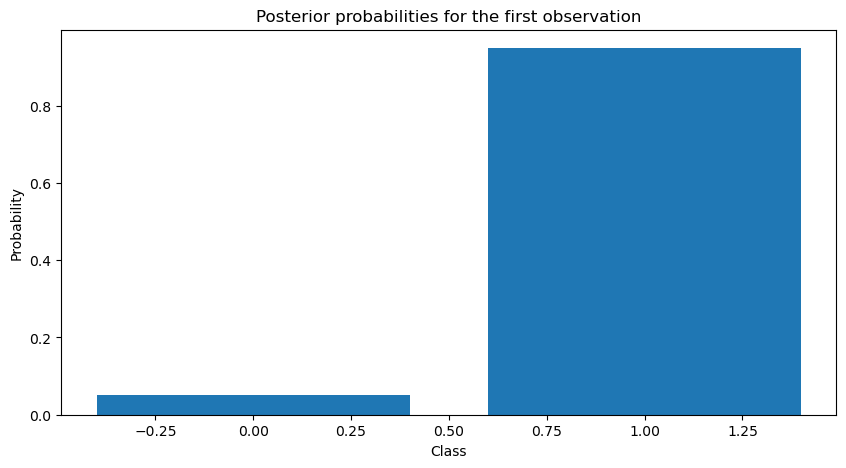

In [13]:
# Visualizar el modelo

probabilities = model.predict_proba(X_test)

# Crear un gráfico de barras con las probabilidades de la primera observación
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(probabilities[0])), probabilities[0])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Posterior probabilities for the first observation')
plt.show()